# **Guía para: Implementación y visualización de una regresión lineal múltiple en Python**

# Implementación y visualización de una regresión lineal múltiple en Python con la librería SciKit Learn

SciKit Learn es prácticamente el estándar de oro cuando se trata de aprendizaje automático en Python. Tiene muchos algoritmos de aprendizaje, para regresión, clasificación, agrupamiento y reducción de dimensionalidad.

Para nuestro proyecto realizaremos un algoritmo de regresión lineal multiple que alimentaremos los datos de consumo que recolectamos durante el semestre.

# **Implementación:**
Cargando y explorando los datos

Recordemos como cargar y explorar nuestros datos, primero tenemos que subir nuestro archivo Excel a Google Colab

1. Crea una libreta de Google Colab con el nombre de la fase.

2. Da clic en la carpeta Files del lado izquierdo de la pantalla

3. Da clic en Upload, selecciona tu archivo Excel con tus datos de consumo y da clic en Open. Se sugiere ponerle nombre corto sin mayúsculas ni espacios a tu archivo, por ejemplo: datos

4. OK en el mensaje que nos indica que el archivo solo estará disponible en esta sesión

5. Verifica que se cargó el archivo

Con el archivo en Colab, utilizaremos la librería Pandas para cargar los datos en un DataFrame.

Crearemos una celda de código nueva para cada línea de código e iremos escribiendo y corriendo una por una para detectar posibles errores ademas de ver los resultados al ir avanzando:

In [ ]:
import pandas as pd # importa la librería pandas y la asigna a la variable pd

Creamos la variable datos_consumo para cargar el archivo con la función read_excel de la librería Pandas:

In [ ]:
datos_consumo = pd.read_excel('datos.xlsx') # indicamos el nombre de nuestro archivo a ser leído

Usamos la función head() para comprobar que los datos se cargaron correctemente en el dataframe viendo los primeros 5 registros:

In [ ]:
datos_consumo.head()

,Fecha,Hora,Momento,Nombre,Calorias (kcal),Carbohidratos (g),Lípidos (g),Proteína (g),Sodio (mg)
0,44613,0.250000,Desayuno,Hot Cakes,334,52,4,11,596
1,44613,0.458333,Desayuno,Fuze Tea,116,27,0,1,0
2,44613,0.583333,Comida,Chicken Teriyaki Subway,62,9,1,4,128
3,44613,0.875000,Cena,Cereal Choco Krispis,153,31,1,6,240
4,44614,0.312500,Desayuno,Cuernito con jamón,213,30,5,6,508


Realizaremos una breve exploración de nuestros datos para ver como se distribuyen:

In [ ]:
datos_consumo.groupby("Momento").count() # con la función groupby agrupamos los datos de la columna Momento y con count() los contamos para obtener subtotales

,Fecha,Hora,Nombre,Calorias (kcal),Carbohidratos (g),Lípidos (g),Proteína (g),Sodio (mg)
Momento,,,,,,,,
Almuerzo,92,92,92,92,92,92,92,92
Cena,100,100,100,100,100,100,100,100
Comida,99,99,99,99,99,99,99,99
Desayuno,103,103,103,103,103,103,103,103


Usamos la función describe() para obtener la estadística descriptiva y completar la exploración de nuestros datos:

In [ ]:
datos_consumo.describe()

,Fecha,Hora,Calorias (kcal),Carbohidratos (g),Lípidos (g),Proteína (g),Sodio (mg)
count,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000
mean,44662.182741,0.598668,205.870558,13.517766,8.664975,18.091371,363.083756
std,28.565039,0.235497,94.825733,22.131712,5.972749,10.130787,362.167613
min,44613.000000,0.250000,52.000000,0.000000,0.000000,1.000000,0.000000
25%,44638.000000,0.427083,116.000000,0.000000,4.000000,7.000000,66.000000
50%,44662.000000,0.625000,183.000000,2.000000,6.000000,18.000000,240.000000
75%,44687.000000,0.791667,280.000000,31.000000,7.000000,22.000000,508.000000
max,44711.000000,0.958333,900.000000,210.000000,24.000000,132.000000,4110.000000


# **Seleccionando los datos**

Creamos una variable datos para asignarle el DafaFrame que contendrá solo los datos que analizaremos, utilizamos la función iloc[ ] para seleccionar los elementos de acuerdo a su ubicación. Su sintaxis es iloc[<filas>, <columnas>]:

In [ ]:
datos_seleccionados = datos_consumo.iloc[:,3:8] # : selecciona todas las filas y 3:8(-1) seleccion columnas de la 4 la 7

datos_seleccionados # desplegamos el dataframe

,Nombre,Calorias (kcal),Carbohidratos (g),Lípidos (g),Proteína (g)
0,Hot Cakes,334,52,4,11
1,Fuze Tea,116,27,0,1
2,Chicken Teriyaki Subway,62,9,1,4
3,Cereal Choco Krispis,153,31,1,6
4,Cuernito con jamón,213,30,5,6
...,...,...,...,...,...
389,tacos de carne molida y verduras,276,0,19,25
390,Sandwich de Pavo,280,46,4,18
391,Pechuga de pollo y arroz,145,0,6,22
392,tacos de carne molida y verduras,276,0,19,25


Con la función info() vemos la información completa de los datos del nuevo dataframe, ya solo debemos tener los valores numéricos.

In [ ]:

datos_seleccionados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394 entries, 0 to 393
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Nombre             394 non-null    object
 1   Calorias (kcal)    394 non-null    int64 
 2   Carbohidratos (g)  394 non-null    int64 
 3   Lípidos (g)        394 non-null    int64 
 4   Proteína (g)       394 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.5+ KB


# **Limpiando los datos**

Antes de continuar vamos a limpiar un poco nuestros datos utilizando las siguientes funciones:

In [ ]:
datos_seleccionados.isnull().values.any() # buscamos valores nulos y obtenemos True o False dependiendo si hay o no

dataset = datos_seleccionados.dropna() # creamos un nuevo dataframe descartando los valores nulos o vacíos de nuestro dataframe datos_seleccionados

dataset.isnull().sum() # validamos que no tenemos valores nulos en ninguna columna, todos deben dar cero

Nombre               0
Calorias (kcal)      0
Carbohidratos (g)    0
Lípidos (g)          0
Proteína (g)         0
dtype: int64

# **Preparando los datos**

El siguiente paso es asignar los atributos a las variables en nuestros datos. La variable X contiene los atributos de entrada y la variable y los atributos de salida:

In [ ]:

dataset.columns # vemos los nombres de nuestras columnas para asignarlos a las variables

Index(['Nombre', 'Calorias (kcal)', 'Carbohidratos (g)', 'Lípidos (g)',
       'Proteína (g)'],
      dtype='object')

In [ ]:
X = dataset[['Carbohidratos (g)', 'Lípidos (g)', 'Proteína (g)']].values # variables independientes

y = dataset['Calorias (kcal)'].values # variable dependiente

Ahora dividimos nuestros datos en un conjunto de entrenamiento (80%) y un conjunto de prueba (20%). Con los datos de entrenamiento realizamos el aprendizaje automático y con los datos de prueba realizamos la validación:

In [ ]:
from sklearn.model_selection import train_test_split # importamos la herramienta para dividir los datos de SciKit-Learn

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # asignación de los datos 80% para entrenamiento y 20% para prueba

# **Modelación de los datos**

De la librería SciKit-Learn importamos  la clase de regresión lineal y crearemos un objeto de esa clase, que será nuestro modelo de regresión lineal:

In [ ]:
from sklearn.linear_model import LinearRegression # importamos la clase de regresión lineal

modelo_regresion = LinearRegression() # modelo de regresión

Ya con el modelo, utilizaremos la función fit() para "ajustar" el modelo a nuestro conjunto de datos. Esto permite al modelo "estudiar" nuestros datos y "aprender" de ellos:

In [ ]:
modelo_regresion.fit(X_train, y_train) # aprendizaje automático con base en nuestros datos

LinearRegression()

En este punto, el algorítmo ya ha aprendido cuales son los coeficientes de X óptimos para satisfacer el modelo. Para verlos copiamos el siguiente código:

In [ ]:
x_columns = ['Carbohidratos (g)', 'Lípidos/grasas (g)', 'Proteína (g)']
coeff_df = pd.DataFrame(modelo_regresion.coef_, x_columns, columns=['Coeficientes'])
coeff_df # despliega los coefientes y sus valores; por cada unidad del coeficente, su impacto en las calorías será igual a su valor

,Coeficientes
Carbohidratos (g),2.987680
Lípidos/grasas (g),7.516915
Proteína (g),3.268298


Ahora que hemos creado nuestro modelo y lo hemos entrenado, es hora de probar el modelo con nuestro conjunto de datos de prueba:

In [ ]:

y_pred = modelo_regresion.predict(X_test) # probamos nuestro modelo con los valores de prueba

Revisemos la diferencia entre los valores actuales y los valores de predicción en la comparación:

In [ ]:
validacion = pd.DataFrame({'Actual': y_test, 'Predicción': y_pred, 'Diferencia': y_test-y_pred}) # creamos un dataframe con los valores actuales y los de predicción

muestra_validacion = validacion.head(25) # elegimos una muestra con 25 valores 

muestra_validacion # desplegamos esos 25 valores 

,Actual,Predicción,Diferencia
0,276,266.816916,9.183084
1,276,266.816916,9.183084
2,145,159.292133,-14.292133
3,280,268.618413,11.381587
4,276,266.816916,9.183084
5,276,266.816916,9.183084
6,276,266.816916,9.183084
7,106,123.759944,-17.759944
8,106,123.759944,-17.759944
9,106,123.759944,-17.759944


Usamos la función describe() para obtener la estadística descriptiva de la columna Diferencia:

In [ ]:
validacion["Diferencia"].describe()

count    79.000000
mean     -5.317322
std      13.913567
min     -35.383921
25%     -17.759944
50%     -14.292133
75%       9.183084
max      28.310823
Name: Diferencia, dtype: float64

Podemos usar la raíz de la desviación media cuadrada, para determinar que tan preciso es el modelo. Aquí buscamos que su valor sea menor al 10% de la media de la variable y:



In [ ]:
from sklearn import metrics # importamos las métricas

import numpy as np

print("Raíz de la desviación media al cuadrado:", np.sqrt(metrics.mean_squared_error(y_test, y_pred))) # imprimimos la raíz de la desviación media al cuadrado

Raíz de la desviación media al cuadrado: 14.812521328063458


# **Visualización de los datos **
Ahora toca realizar los gráficos para la visualización de los datos para hacer la comparación de valores actuales y de predicción y estimar de manera visual que tan preciso o no es nuestro modelo para calcular calorías. 
Para esto importamos la librería matplotlib:

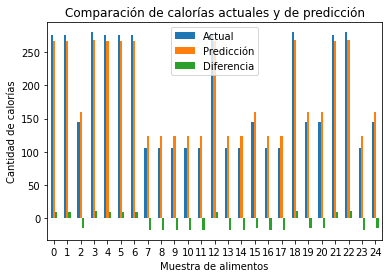

In [ ]:
import matplotlib.pyplot as plt # importamos la librería que nos permitirá graficar

muestra_validacion.plot.bar(rot=0)  # creamos un gráfico de barras con el dataframe que contiene nuestros datos actuales y de predicción

plt.title("Comparación de calorías actuales y de predicción") # indicamos el título del gráfico

plt.xlabel("Muestra de alimentos") # indicamos la etiqueta del eje de las x, los alimentos

plt.ylabel("Cantidad de calorías") # indicamos la etiqueta del eje de las y, la cantidad de calorías

plt.show() # desplegamos el gráfico